unzip dataset

In [ ]:
import os
import zipfile
import cv2
import numpy as np
ZIP_FILE = "/content/image_dataset.zip"
EXTRACT_PATH = "fashion_dataset"

with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

data exploring

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "/content/fashion_dataset/image_dataset/Clothes_Dataset"
labels = os.listdir(dataset_path)
print(labels)

['hoodies', 'skrits', 'shorts', 'Jeans', 'Dress']


In [ ]:
data = []
data_labels = []

for lable in labels :
    folder_path = os.path.join(dataset_path, lable)
    image_paths = os.listdir(folder_path)
    data.extend([os.path.join(folder_path, image_path) for image_path in image_paths])
    data_labels.extend([lable] * len(image_paths))
data = pd.DataFrame({'Image_Path' : data, 'labels' : data_labels})
data

,Image_Path,labels
0,/content/fashion_dataset/image_dataset/Clothes...,hoodies
1,/content/fashion_dataset/image_dataset/Clothes...,hoodies
2,/content/fashion_dataset/image_dataset/Clothes...,hoodies
3,/content/fashion_dataset/image_dataset/Clothes...,hoodies
4,/content/fashion_dataset/image_dataset/Clothes...,hoodies
...,...,...
1466,/content/fashion_dataset/image_dataset/Clothes...,Dress
1467,/content/fashion_dataset/image_dataset/Clothes...,Dress
1468,/content/fashion_dataset/image_dataset/Clothes...,Dress
1469,/content/fashion_dataset/image_dataset/Clothes...,Dress


data visualization in gray scale

Displaying Some Sample images of 'hoodies' categorie : 


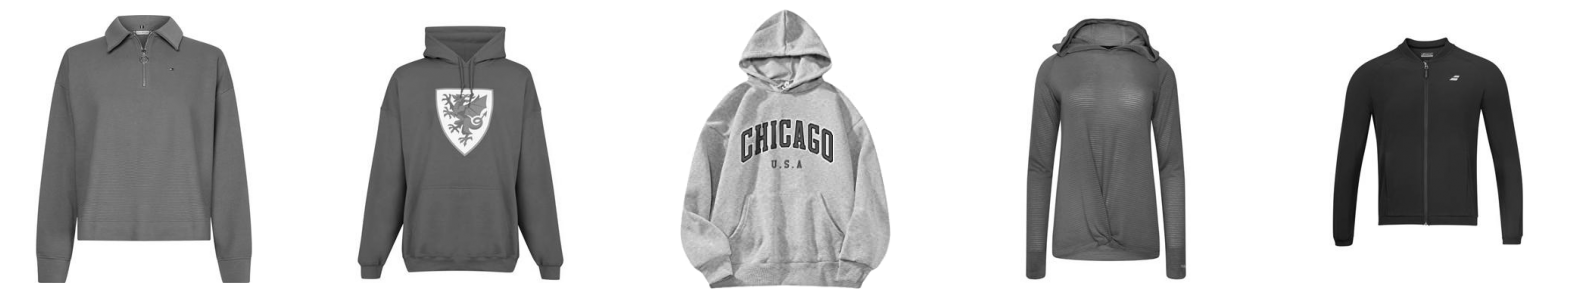

Displaying Some Sample images of 'skrits' categorie : 


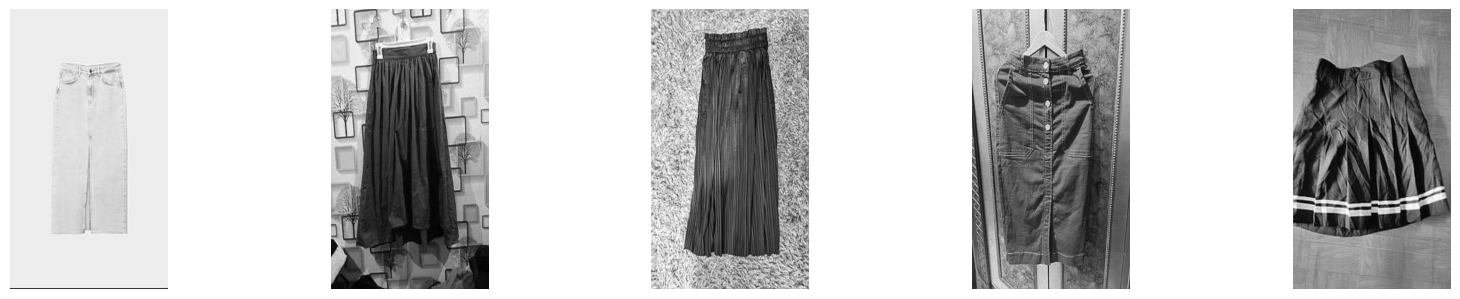

Displaying Some Sample images of 'shorts' categorie : 


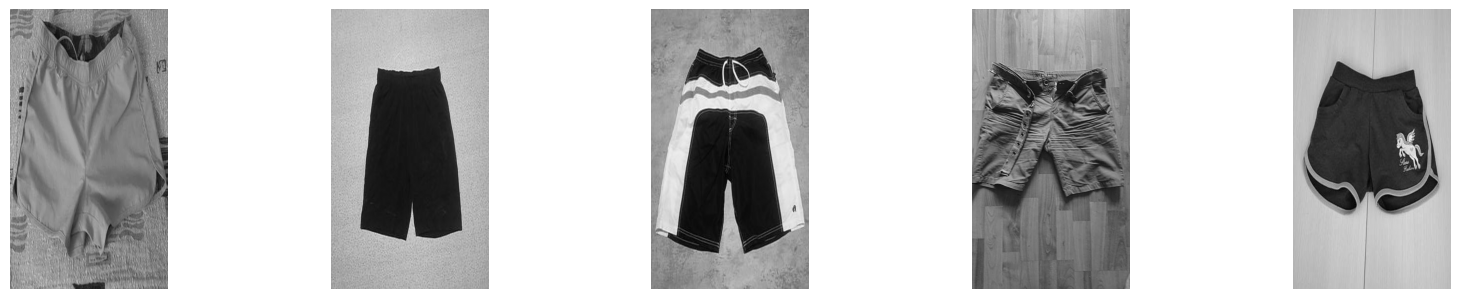

Displaying Some Sample images of 'Jeans' categorie : 


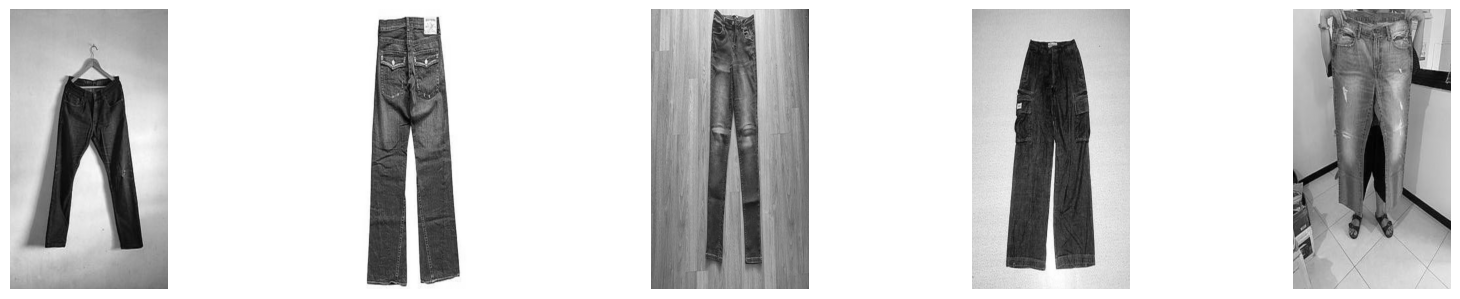

Displaying Some Sample images of 'Dress' categorie : 


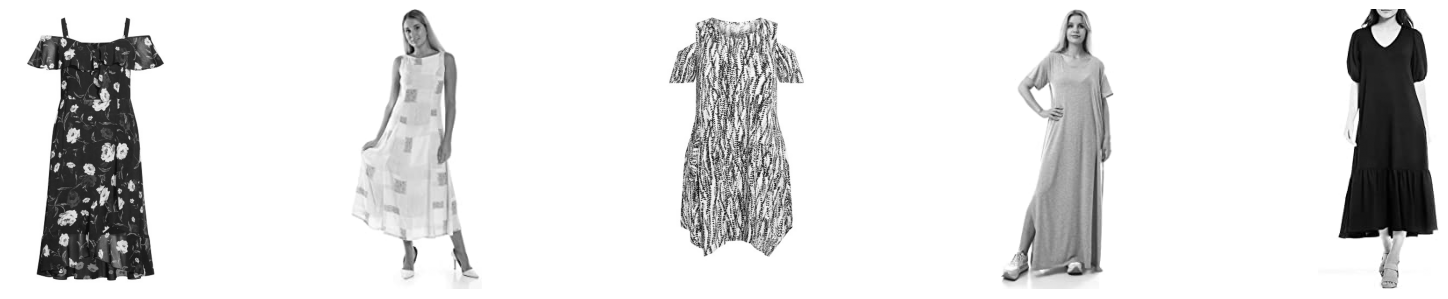

In [ ]:
for label in labels:
    sample_images = data[data['labels'] == label]['Image_Path'].reset_index(drop=True)[:5]

    print(f"Displaying Some Sample images of '{label}' categorie : ")
    plt.figure(figsize=(20, 8))
    for i in range(len(sample_images)):
      plt.subplot(2, 5, i + 1)
      img = cv2.imread(sample_images[i], cv2.IMREAD_GRAYSCALE)
      plt.imshow(img, cmap="gray")
      plt.axis("off")
    plt.show()

rgb

In [ ]:
for label in labels:
    sample_images = data[data['labels'] == label]['Image_Path'].reset_index(drop=True)[:5]
    print(f"Displaying Some Sample images of '{label}' categorie : ")
    plt.figure(figsize=(20, 8))
    for i in range(len(sample_images)):
        plt.subplot(2, 5, i + 1 + 5)
        img = cv2.imread(sample_images[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(label, fontsize=9)
        plt.axis('off')

    plt.show()

cnn

Found 1178 images belonging to 5 classes.
Found 293 images belonging to 5 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      18,874,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,894,533 (72.08 MB)

 Trainable params: 18,894,533 (72.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.2669 - loss: 3.6389 - val_accuracy: 0.5870 - val_loss: 1.0682
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7071 - loss: 0.8978 - val_accuracy: 0.6416 - val_loss: 0.9855
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8160 - loss: 0.5219 - val_accuracy: 0.6621 - val_loss: 0.9493
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8863 - loss: 0.3554 - val_accuracy: 0.5939 - val_loss: 1.2331
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9212 - loss: 0.2494 - val_accuracy: 0.7031 - val_loss: 1.1293
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9547 - loss: 0.1475 - val_accuracy: 0.6860 - val_loss: 1.1014
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9606 - loss: 0.1268 - val_accuracy: 0.7372 - val_loss: 1.1127
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9772 - loss: 0.0938 - val_accuracy: 0.7201 - va

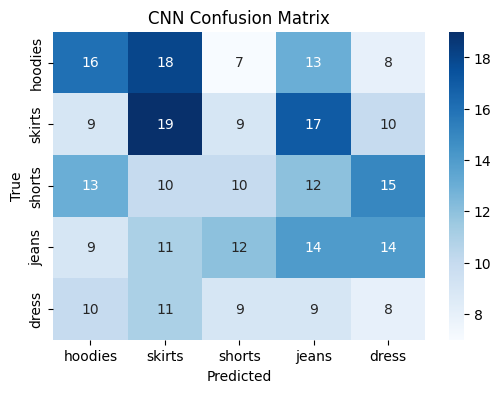

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hyperparameters
IMG_SIZE = (200, 200)
BATCH_SIZE = 16
EPOCHS = 10

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import save_model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_data, epochs=EPOCHS, validation_data=val_data)
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
val_data.reset()
preds = model.predict(val_data)
y_pred = np.argmax(preds, axis=1)
y_true = val_data.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=labels))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
history_cnn = model.fit(train_data, epochs=EPOCHS, validation_data=val_data)
cnn_results = history_cnn.history['val_accuracy']

MobileNetV2

Found 1178 images belonging to 5 classes.
Found 293 images belonging to 5 classes.


<ipython-input-49-bc8ac2fd545a>:28: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(200, 200, 3))


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 100, 100, 32)   │            864 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 100, 100, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 100, 100, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 100, 100, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 100, 100, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 100, 100, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 100, 100, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 100, 100, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 100, 100, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 100, 100, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 100, 100, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 101, 101, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 50, 50, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 58s 694ms/step - accuracy: 0.6314 - loss: 0.9790 - val_accuracy: 0.8703 - val_loss: 0.3431
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 49s 657ms/step - accuracy: 0.9004 - loss: 0.2910 - val_accuracy: 0.8908 - val_loss: 0.2860
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 81s 642ms/step - accuracy: 0.9488 - loss: 0.1559 - val_accuracy: 0.8771 - val_loss: 0.3263
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 652ms/step - accuracy: 0.9576 - loss: 0.1452 - val_accuracy: 0.8976 - val_loss: 0.2662
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 49s 658ms/step - accuracy: 0.9685 - loss: 0.0893 - val_accuracy: 0.8737 - val_loss: 0.3593
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 83s 673ms/step - accuracy: 0.9655 - loss: 0.0960 - val_accuracy: 0.9147 - val_loss: 0.2697
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 653ms/step - accuracy: 0.9825 - loss: 0.0625 - val_accuracy: 0.8976 - val_loss: 0.2592
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 49s 657ms/step - accuracy: 0.9838 - loss: 0.0550 - val_accuracy: 0.914

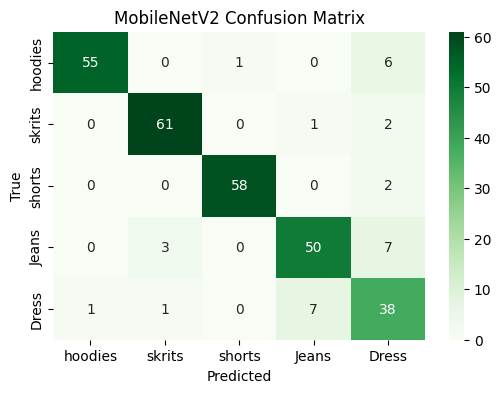

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

#preprocessing
datagen_mobilenet = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_gen_mobilenet = datagen_mobilenet.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen_mobilenet = datagen_mobilenet.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(200, 200, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(label), activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=outputs)
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()
mobilenet_model.fit(train_gen_mobilenet, validation_data=val_gen_mobilenet, epochs=EPOCHS)
val_gen_mobilenet.reset()
preds = mobilenet_model.predict(val_gen_mobilenet)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen_mobilenet.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("MobileNetV2 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
history_mobilenet = mobilenet_model.fit(train_gen_mobilenet, validation_data=val_gen_mobilenet, epochs=EPOCHS)
mobilenet_results = history_mobilenet.history['val_accuracy']


EfficientNetB0

Found 1178 images belonging to 5 classes.
Found 293 images belonging to 5 classes.


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 200, 200, 3)    │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 200, 200, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 200, 200, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 201, 201, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 100, 100, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 100, 100, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 100, 100, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 100, 100, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 100, 100, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 100, 100, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,214,184 (16.08 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6884 - loss: 0.8069 - val_accuracy: 0.8840 - val_loss: 0.3238
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9089 - loss: 0.2374 - val_accuracy: 0.8976 - val_loss: 0.2637
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9564 - loss: 0.1146 - val_accuracy: 0.9113 - val_loss: 0.2811
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9603 - loss: 0.1072 - val_accuracy: 0.9249 - val_loss: 0.2360
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9658 - loss: 0.0897 - val_accuracy: 0.9215 - val_loss: 0.2581
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9761 - loss: 0.0595 - val_accuracy: 0.9181 - val_loss: 0.2652
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9888 - loss: 0.0443 - val_accuracy: 0.9113 - val_loss: 0.2765
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9869 - loss: 0.0461 - val_accuracy: 0.9181 - val_l

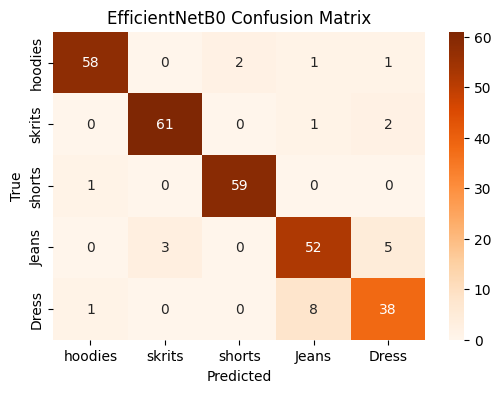

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

datagen_efficientnet = ImageDataGenerator(preprocessing_function=efficientnet_preprocess, validation_split=0.2)
train_gen_efficientnet = datagen_efficientnet.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen_efficientnet = datagen_efficientnet.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(200, 200, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(labels), activation='softmax')(x)

efficientnet_model = Model(inputs=base_model.input, outputs=outputs)
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
efficientnet_model.summary()
efficientnet_model.fit(train_gen_efficientnet, validation_data=val_gen_efficientnet, epochs=EPOCHS)
val_gen_efficientnet.reset()
preds = efficientnet_model.predict(val_gen_efficientnet)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen_efficientnet.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title("EfficientNetB0 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
history_efficientnet = efficientnet_model.fit(train_gen_efficientnet, validation_data=val_gen_efficientnet, epochs=EPOCHS)
efficientnet_results = history_efficientnet.history['val_accuracy']


statistical tests

In [ ]:
from scipy.stats import f_oneway, ttest_ind, levene

# 1. F-test (Levene's Test for Equal Variances)
print("F-test (Levene’s Test for Equal Variance):")
stat, p = levene(cnn_results, mobilenet_results, efficientnet_results)
print(f"F = {stat:.4f}, p = {p:.4f} → {'Equal variances' if p > 0.05 else 'Unequal variances'}")

# 2. T-tests (pairwise between models)
print("\nIndependent t-tests (pairwise):")
t_stat, p_val = ttest_ind(cnn_results, mobilenet_results, equal_var=True)
print(f"CNN vs MobileNetV2: t = {t_stat:.4f}, p = {p_val:.4f}")

t_stat, p_val = ttest_ind(cnn_results, efficientnet_results, equal_var=True)
print(f"CNN vs EfficientNetB0: t = {t_stat:.4f}, p = {p_val:.4f}")

t_stat, p_val = ttest_ind(mobilenet_results, efficientnet_results, equal_var=True)
print(f"MobileNetV2 vs EfficientNetB0: t = {t_stat:.4f}, p = {p_val:.4f}")

# 3. ANOVA Test (all models together)
print("\nOne-way ANOVA Test:")
anova_stat, anova_p = f_oneway(cnn_results, mobilenet_results, efficientnet_results)
print(f"F = {anova_stat:.4f}, p = {anova_p:.4f} → {'Significant difference' if anova_p < 0.05 else 'No significant difference'}")


F-test (Levene’s Test for Equal Variance):
F = 3.2035, p = 0.0564 → Equal variances

Independent t-tests (pairwise):
CNN vs MobileNetV2: t = -9.8198, p = 0.0000
CNN vs EfficientNetB0: t = -13.6705, p = 0.0000
MobileNetV2 vs EfficientNetB0: t = -2.1450, p = 0.0458

One-way ANOVA Test:
F = 107.5901, p = 0.0000 → Significant difference


In [ ]:
efficientnet_model.save('model.keras')